In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [19]:
df = pd.read_excel('dataset1.xlsx')

In [20]:
df.info


<bound method DataFrame.info of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      

In [21]:
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
##Calculate the mean, median, and standard deviation of the "age" and "hours-per-week" columns. What do these values suggest about the distribution of ages and working hours in the dataset?##
ans = {'age': 
       {'mean': df['age'].mean(),
        'median': df['age'].median(),
        'stdard deviation': df['age'].std()},
    'hours-per-week': 
       {'mean': df['hours-per-week'].mean(),
        'median': df['hours-per-week'].median(),
        'standard  deviation': df['hours-per-week'].std()}}
print(ans)

{'age': {'mean': 38.58164675532078, 'median': 37.0, 'stdard deviation': 13.640432553581146}, 'hours-per-week': {'mean': 40.437455852092995, 'median': 40.0, 'standard  deviation': 12.34742868173081}}


In [ ]:
##The working hours and age are distributed almost equally.##  

In [30]:
##Find the distribution of individuals across different "workclass." Which workclass category is the most common?##

distribution = df['workclass'].value_counts()
common_work_class = distribution.idxmax()
print(distribution) 
print(common_work_class)

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Private


In [32]:
##private is the most common work class##

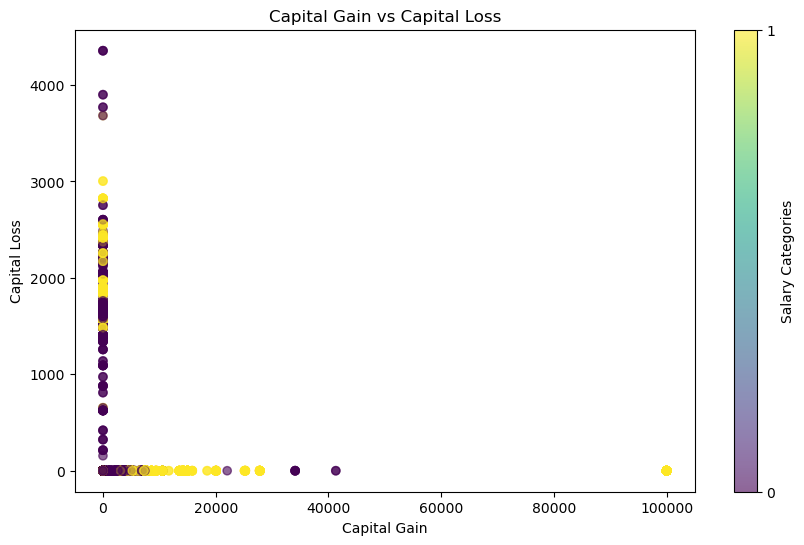

In [43]:
##Create a scatter plot of "capital-gain" vs. "capital-loss," color-coded by "salary." What does the plot reveal about the relationship between capital gains, capital losses, and income?##

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['capital-gain'], df['capital-loss'], 
                      c=df['salary'].astype('category').cat.codes, 
                      cmap='viridis', alpha=0.6)
plt.colorbar(scatter, ticks=range(len(df['salary'].unique())), 
             label='Salary Categories')
plt.xlabel('Capital Gain')
plt.ylabel('Capital Loss')
plt.title('Capital Gain vs Capital Loss')
plt.show()

In [ ]:
##capital gain is higher than that of capital loss. Hence the income is profitable income or rather say income is high##

In [45]:
##Investigate if there is a significant difference in "hours-per-week" between males and females.##

male_hours = df[df['sex'] == 'Male']['hours-per-week']
female_hours = df[df['sex'] == 'Female']['hours-per-week']
t_statistic, p_value = ttest_ind(male_hours, female_hours)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
alpha = 0.05  
if p_value < alpha:
    print("There is statistically significant difference.")

T-statistic: 42.50952506734038
P-value: 0.0
There is statistically significant difference.


marital-status  age  workclass  fnlwgt  education     education-num  occupation        relationship    race   sex     capital-gain  capital-loss  hours-per-week  native-country  salary
Divorced        35   Private    379959  HS-grad       9              Other-service     Not-in-family   White  Female  0             0             40              United-States   <=50K     0.045015
                46   Private    133616  Some-college  10             Adm-clerical      Unmarried       White  Female  0             0             40              United-States   <=50K     0.045015
                18   Private    57413   Some-college  10             Other-service     Own-child       White  Male    0             0             15              United-States   <=50K     0.022507
                19   Local-gov  167816  HS-grad       9              Exec-managerial   Not-in-family   White  Female  0             0             35              United-States   <=50K     0.022507
                     Privat

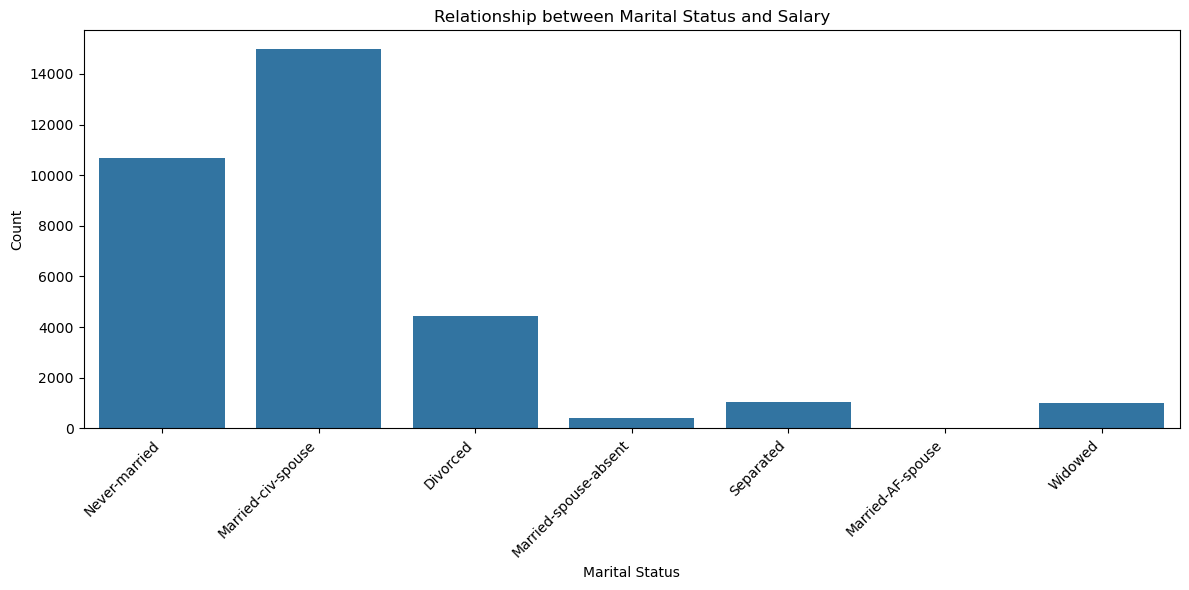

TypeError: crosstab() missing 1 required positional argument: 'columns'

In [67]:
##Analyze the relationship between "marital-status" and "salary." Which marital status category has the highest proportion of individuals earning >50K?##
df.replace(' ?', pd.NA, inplace=True)
marital_salary = df.groupby('marital-status').value_counts(normalize=True) * 100

print(marital_salary)

plt.figure(figsize=(12, 6))
sns.countplot(x='marital-status', data=df)
plt.title('Relationship between Marital Status and Salary')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['marital-status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared test results:")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There's a statistically significant relationship between marital status and salary.")
else:
    print("There's no statistically significant relationship between marital status and salary.")


In [69]:
## dataset 2##

In [126]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [72]:
data = pd.read_excel("dataset2.xlsx")

In [74]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3325 non-null   object 
 4   Voice mail plan         3331 non-null   object 
 5   Number vmail messages   3331 non-null   float64
 6   Total day minutes       3330 non-null   float64
 7   Total day calls         3329 non-null   float64
 8   Total day charge        3332 non-null   float64
 9   Total eve minutes       3331 non-null   float64
 10  Total eve calls         3330 non-null   float64
 11  Total eve charge        3331 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [90]:
missing_values = data.isnull().sum()
print(missing_values)


State                     0
Account length            0
Area code                 0
International plan        8
Voice mail plan           2
Number vmail messages     2
Total day minutes         3
Total day calls           4
Total day charge          1
Total eve minutes         2
Total eve calls           3
Total eve charge          2
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [136]:
df_filled[col] = data_filled[col].fillna(data_filled[col].mode()[0])
print(data_filled)

       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

In [132]:
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer),
        ('onehot', OneHotEncoder)])